In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path 
import os
import tarfile
from urllib import request
import sys
import urllib.request as request
import tarfile
import random
from tqdm import tqdm

%matplotlib inline
sns.set_style("darkgrid") 
sns.set_context("notebook")


In [2]:
FILE = Path('__file__').resolve()
ROOT = FILE.parents[0]  # DATA-SCUENCE-PROJECTS root directory
if ROOT.as_posix() not in sys.path:
    sys.path.append(ROOT.as_posix())  # add ROOT to PATH
ROOT = ROOT.relative_to(Path.cwd())

In [3]:
IMAGES_PATH = ROOT / 'images'
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Get the Data
### Download the Data

In [3]:
TGZ_FILE_NAME = "housing.tgz"
FULL_PATH_DATASETS  = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets"
HOUSING_PATH = ROOT / "datasets"
HOUSING_URL = FULL_PATH_DATASETS + "/housing/" + TGZ_FILE_NAME

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH, tgz_file_name=TGZ_FILE_NAME, rm_tgz_file=True):
    housing_path =  Path(housing_path)
    housing_path.mkdir(parents=True, exist_ok=True)
    tgz_path = housing_path / tgz_file_name
    request.urlretrieve(str(housing_url), tgz_path)
    # Open the .tgz file
    with tarfile.open(tgz_path, "r:gz") as tar:
        # Extract all contents of the .tgz file
        tar.extractall(path=housing_path)
        print("Extracted contents of", tgz_path)
    # Optionally, you can remove the .tgz file
    if rm_tgz_file and tgz_path.exists():
        tgz_path.unlink()
        print("Remove contents of", tgz_path)
    

In [62]:
fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH, tgz_file_name=TGZ_FILE_NAME)

Extracted contents of datasets\housing.tgz
Remove contents of datasets\housing.tgz


In [4]:
def load_data(housing_path, file_name):
    if not isinstance(housing_path, Path) and isinstance(housing_path, str):
        housing_path = Path(housing_path)
    return pd.read_csv(housing_path / file_name)
    

## Take a Quick Look at the Data Structure

In [5]:
housing = load_data(housing_path=HOUSING_PATH, file_name='housing.csv')
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

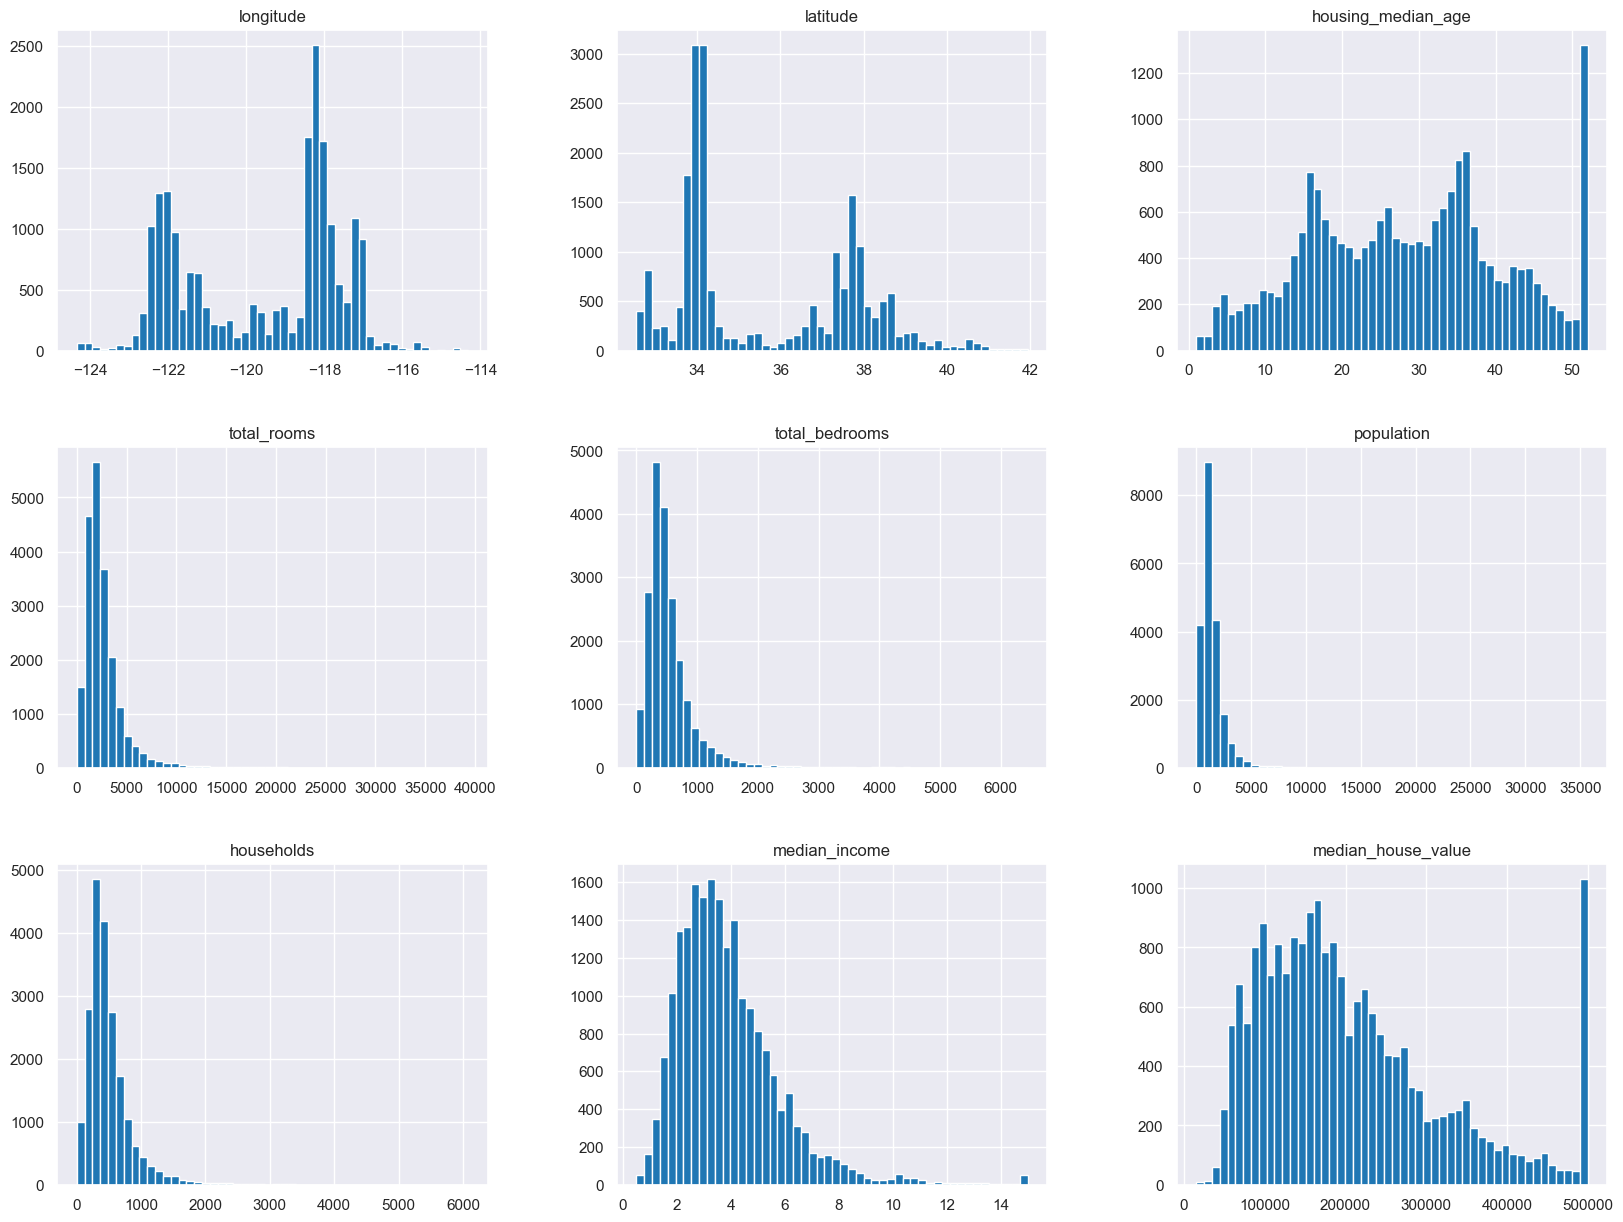

In [9]:
# Create histogram for all variables
housing.hist(bins=50, figsize=(20, 15))

## Create a Test Set

In [17]:
def split_train_test(data, test_rate, shuffle=True, random_state=42):
    assert 0 <= test_rate <= 100, "you must enter a probability between [0, 1] or [0, 100]."
    row, _ = data.shape
    test_size = int(row * (test_rate if test_rate <= 1 else test_rate/100))
    new_data = data.sample(frac=1, random_state=random_state).reset_index(drop=True) if shuffle else data.copy()
    test_data = new_data.iloc[:test_size, :]
    train_data = new_data.iloc[test_size:, :]
    return train_data, test_data

    

In [18]:
train_data, test_data = split_train_test(data=housing, test_rate=0.2)

In [19]:
train_data.shape, test_data.shape

((16512, 10), (4128, 10))

<Axes: >

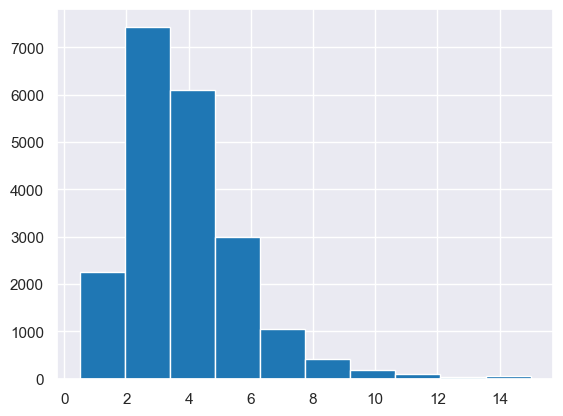

In [24]:
housing["median_income"].hist()
# sns.histplot(data=housing, x='median_income', bins=15)

In [25]:
housing['icome_cat'] = pd.cut(housing['median_income'], 
                              bins=[0., 1.5, 3.5, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

In [26]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,icome_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: >

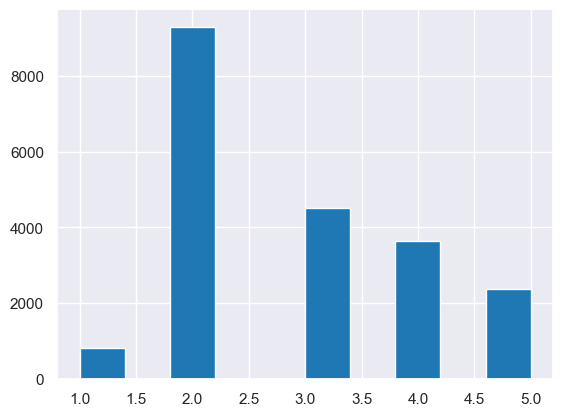

In [33]:
housing.icome_cat.hist()

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing.icome_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [48]:
strat_test_set.icome_cat.value_counts() / len(strat_test_set)

2    0.450581
3    0.218750
4    0.176357
5    0.114341
1    0.039971
Name: icome_cat, dtype: float64

In [51]:
housing.icome_cat.value_counts() / len(housing)

2    0.450630
3    0.218798
4    0.176308
5    0.114438
1    0.039826
Name: icome_cat, dtype: float64

In [49]:
for stat_ in (strat_train_set, strat_test_set):
    stat_.drop('icome_cat', axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [52]:
housing = strat_train_set.copy()

### Discover and Visualize the Data to Gain Insights

<Axes: xlabel='longitude', ylabel='latitude'>

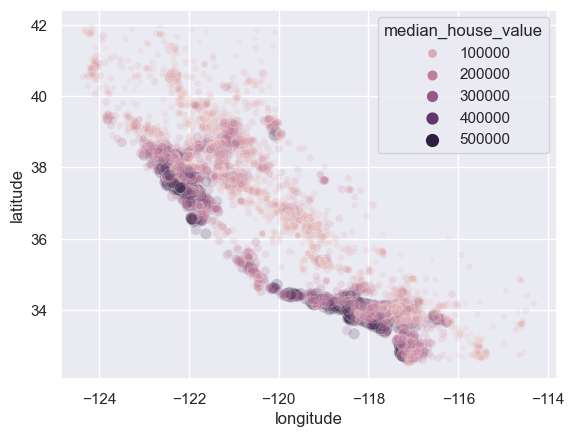

In [74]:
sns.scatterplot(data=housing, 
                x="longitude", 
                y="latitude", 
                hue="median_house_value", 
                size="median_house_value", 
                alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

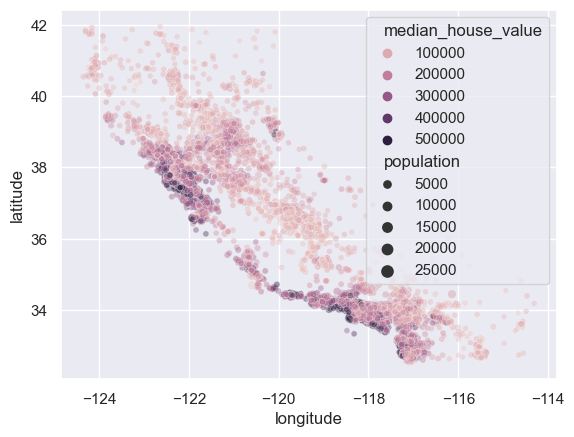

In [82]:
sns.scatterplot(data=housing, 
                x="longitude", 
                y="latitude", 
                hue="median_house_value", 
                size="population", 
                alpha=0.4,
                palette=None)

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

Now start with interesting visual part of my kernel - map visualization. For this problem I use Basemap module - part of matplotlib. (https://matplotlib.org/basemap/users/examples.html)

In [5]:
from mpl_toolkits.basemap import Basemap

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.11 from "c:\Users\Brani\anaconda3\envs\DS\python.exe"
  * The NumPy version is: "1.24.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: Le module spécifié est introuvable.


In [ ]:
def mapWorld():
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
    #m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    
    # #m.drawmapboundary(fill_color='#FFFFFF')
    # lat = data_full['CapitalLatitude'].values
    # lon = data_full['CapitalLongitude'].values
    # a_1 = data_full['Happiness Rank'].values
    # a_2 = data_full['Economy (GDP per Capita)'].values
    # m.scatter(lon, lat, latlon=True,c=100*a_1,s=1000*a_2,linewidth=1,edgecolors='black',cmap='hot', alpha=1)
    
    # m.fillcontinents(color='#072B57',lake_color='#FFFFFF',alpha=0.4)
    # cbar = m.colorbar()
    # cbar.set_label('Happiness Rank*1000')
    # #plt.clim(20000, 100000)
    # plt.title("World Happiness Rank", fontsize=30)
    # plt.show()
sns.set(style="white",font_scale=1.5)
plt.figure(figsize=(30,30))
mapWorld()